In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [2]:
import os
lst = os.listdir('./data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./data/' + file))

In [3]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data['section_rel'] = all_data['section_count_after'] / all_data['section_count_before']
if 'Unnamed: 0' in all_data:
    all_data = all_data.drop(['Unnamed: 0'], axis=1)

In [4]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
print(n_samples)
print(tired_state)
print(awake_state)

1174
1174
1422


In [5]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -2] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -2] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [6]:
len(all_data[all_data.condition == 0])

1174

In [7]:
len(all_data[all_data.condition == 1])

1174

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 2305 to 728
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   section_count_before  2348 non-null   int64  
 1   section_count_after   2348 non-null   int64  
 2   angle_max             2348 non-null   float64
 3   section_max1          2348 non-null   float64
 4   section_max2          2348 non-null   float64
 5   section_max3          2348 non-null   float64
 6   section_max4          2348 non-null   float64
 7   section_max5          2348 non-null   float64
 8   section_median        2348 non-null   float64
 9   section_average       2348 non-null   float64
 10  square                2348 non-null   float64
 11  time                  2348 non-null   float64
 12  time_max1             2348 non-null   float64
 13  time_max2             2348 non-null   float64
 14  time_max3             2348 non-null   float64
 15  time_max4          

In [9]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   section_count_before  0 non-null      int64  
 1   section_count_after   0 non-null      int64  
 2   angle_max             0 non-null      float64
 3   section_max1          0 non-null      float64
 4   section_max2          0 non-null      float64
 5   section_max3          0 non-null      float64
 6   section_max4          0 non-null      float64
 7   section_max5          0 non-null      float64
 8   section_median        0 non-null      float64
 9   section_average       0 non-null      float64
 10  square                0 non-null      float64
 11  time                  0 non-null      float64
 12  time_max1             0 non-null      float64
 13  time_max2             0 non-null      float64
 14  time_max3             0 non-null      float64
 15  time_max4             0 non-null   

In [10]:
all_data.drop_duplicates(keep='first', inplace = True)

In [11]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    plt.show()
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

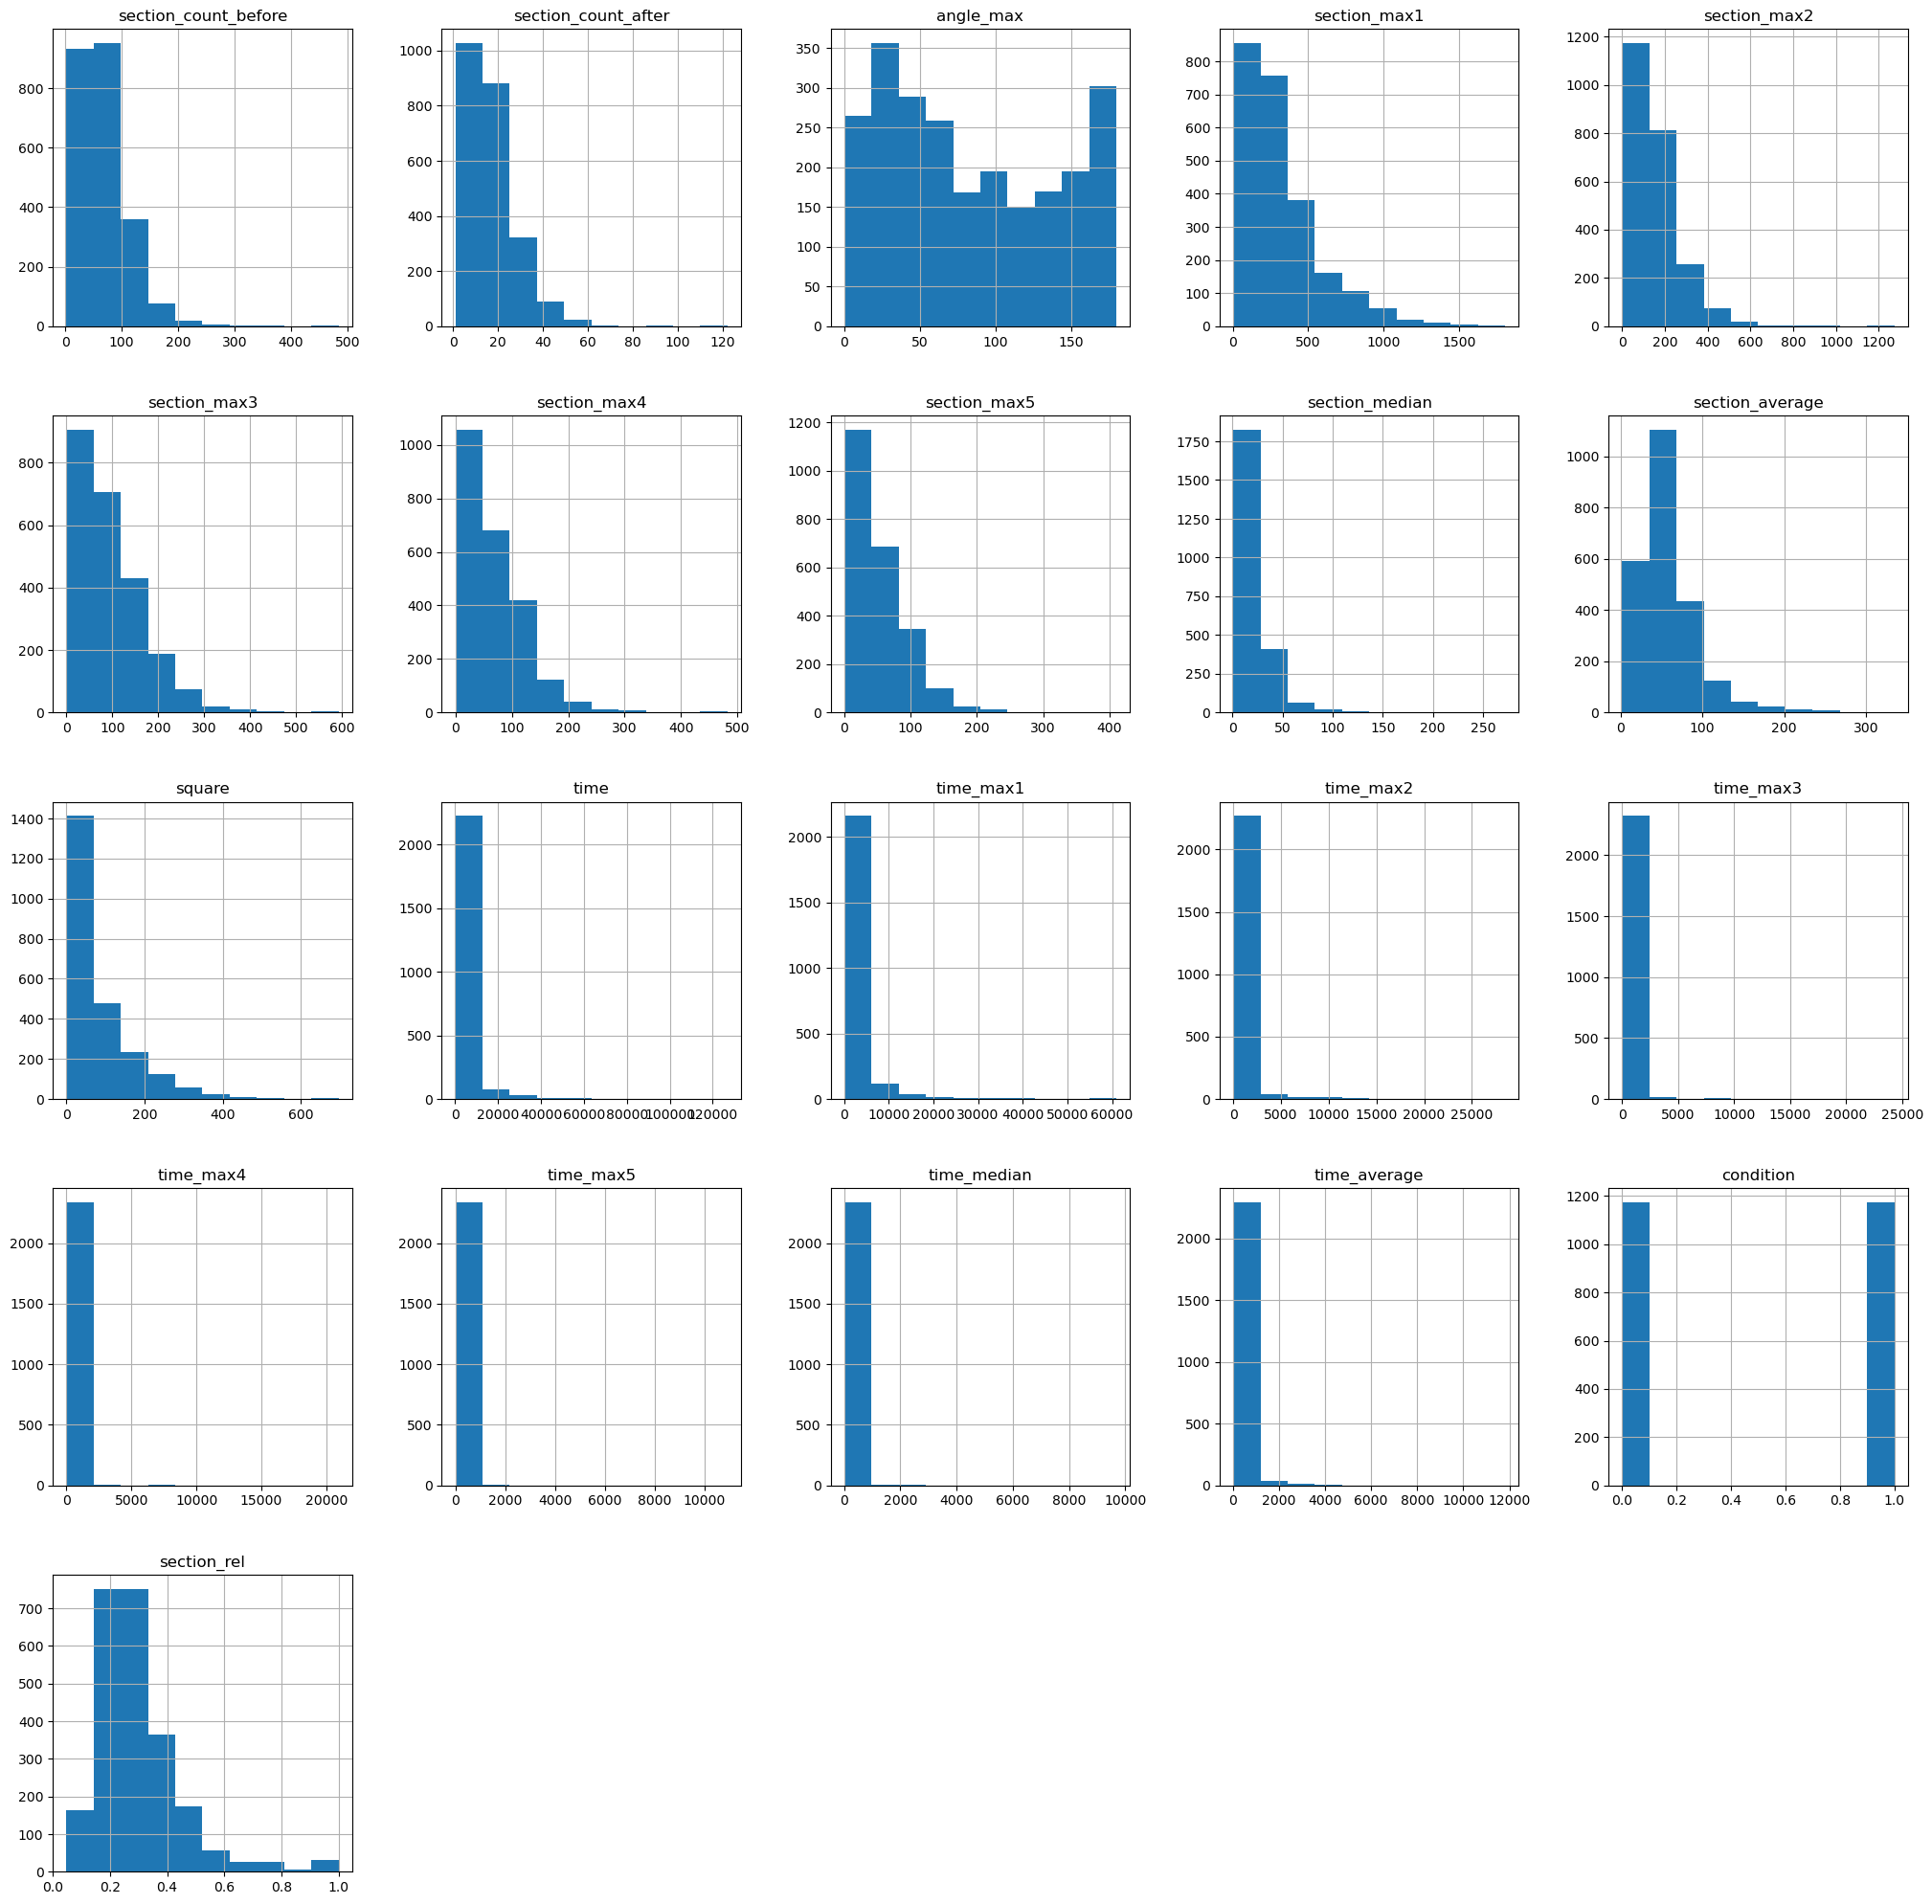

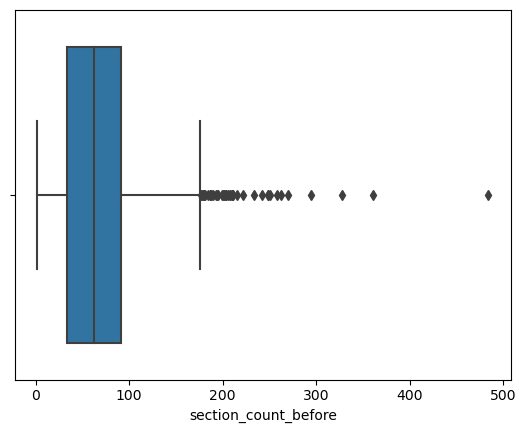

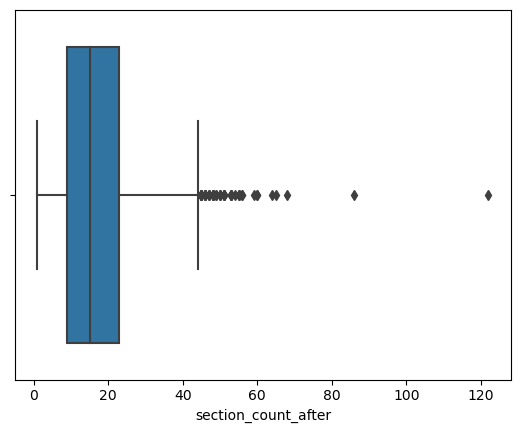

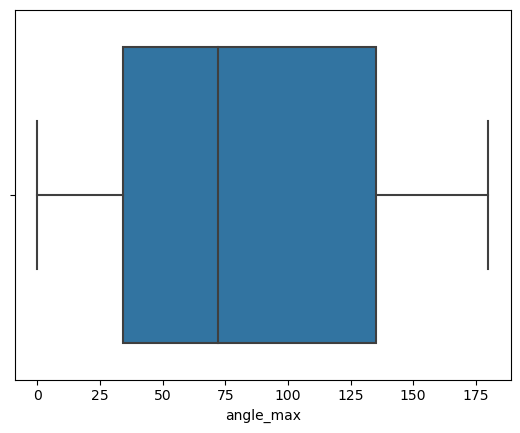

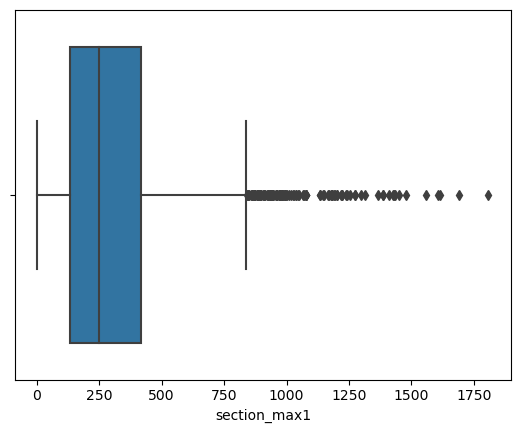

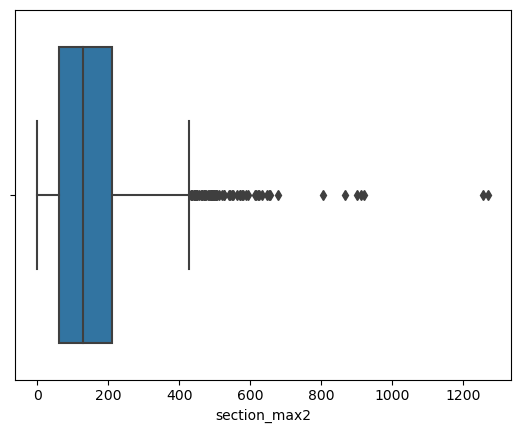

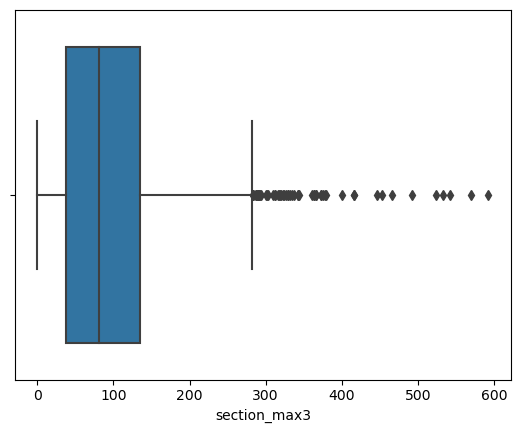

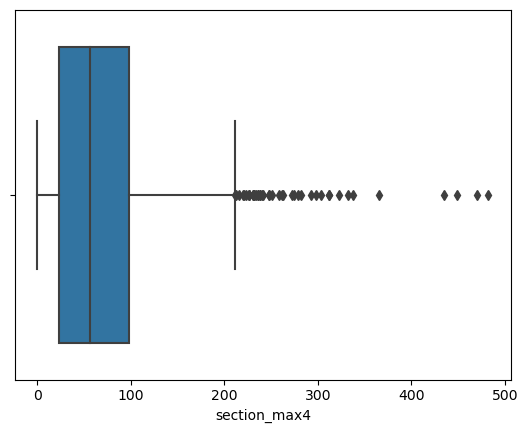

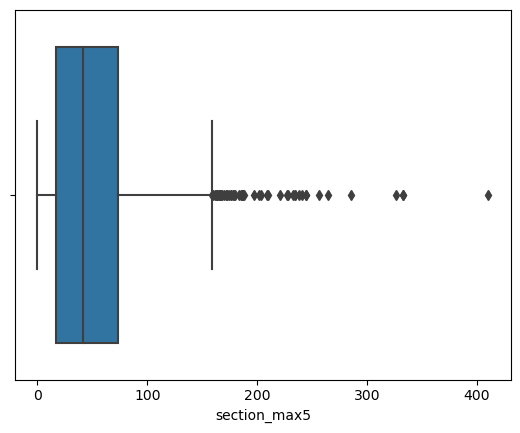

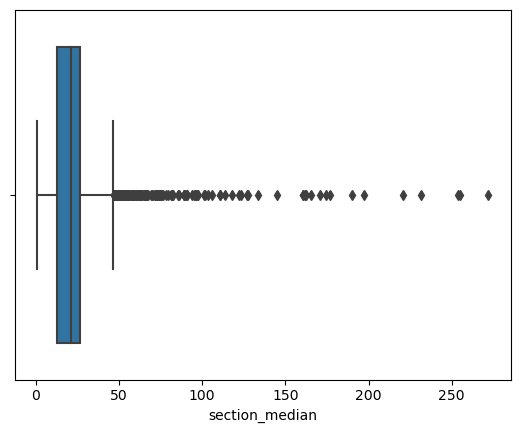

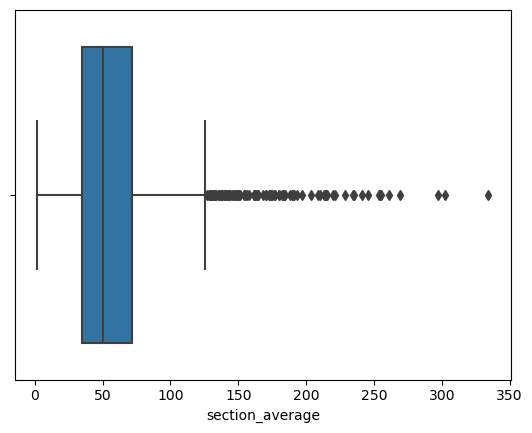

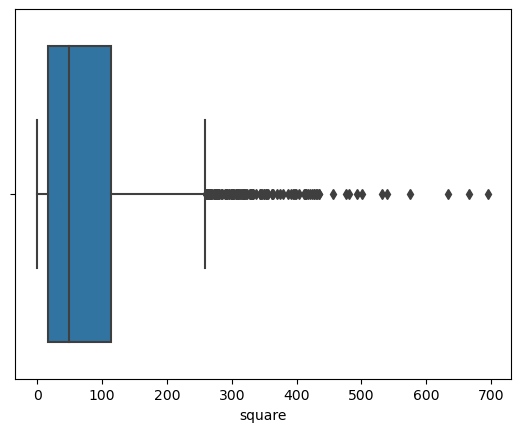

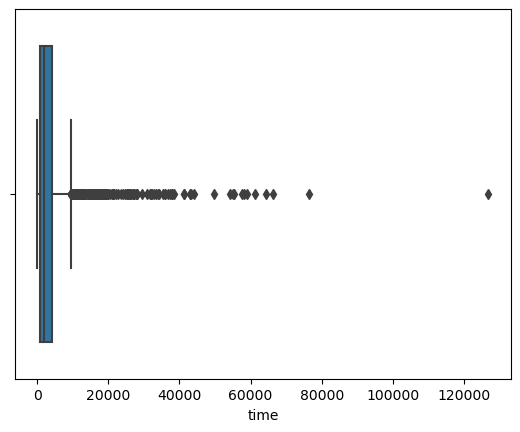

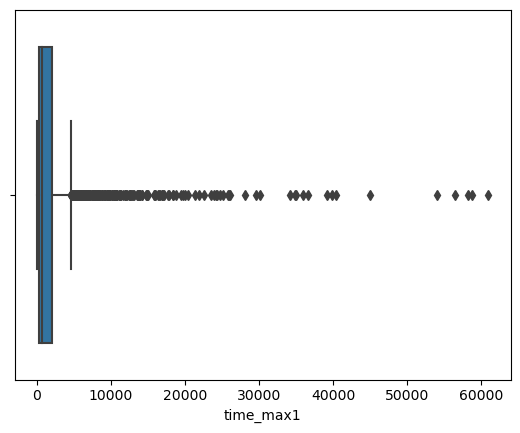

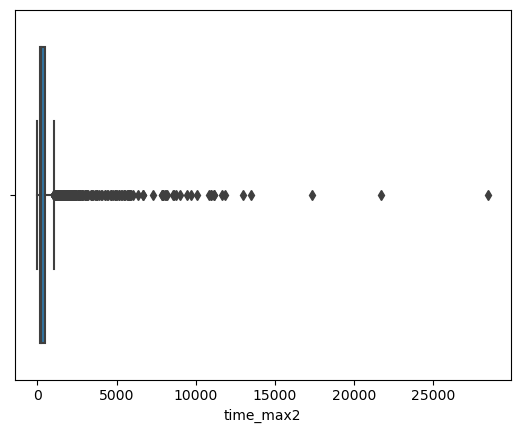

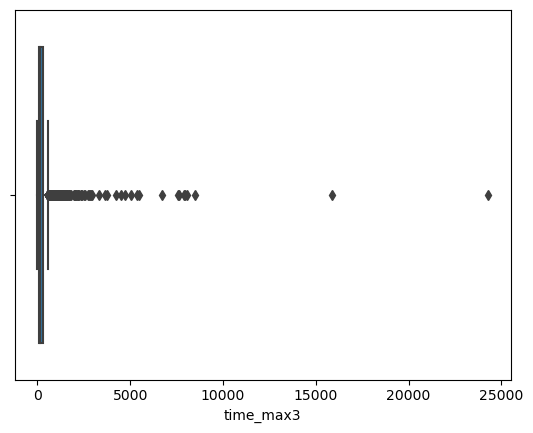

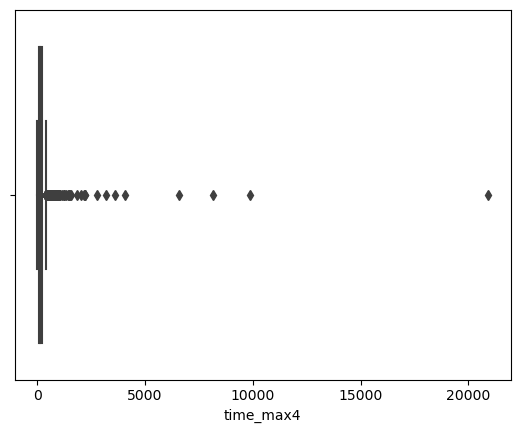

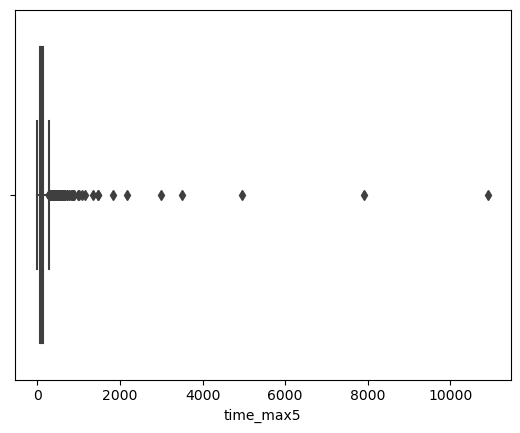

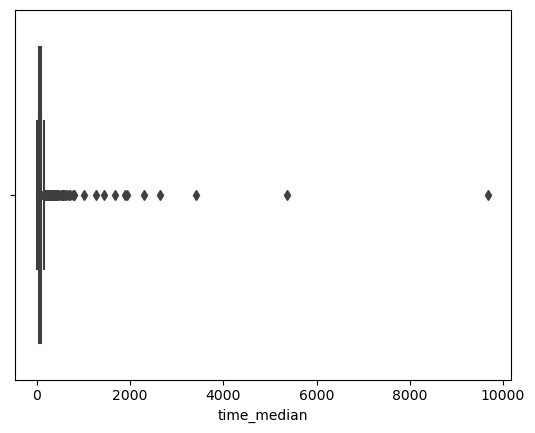

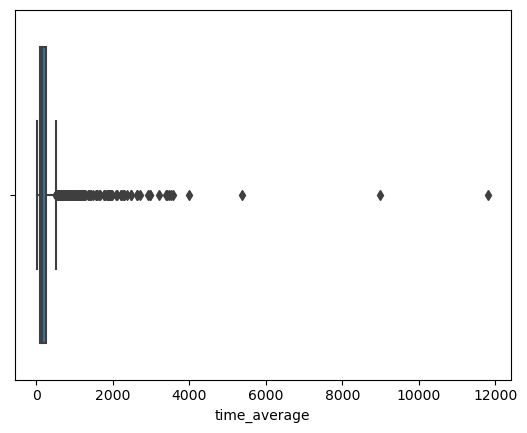

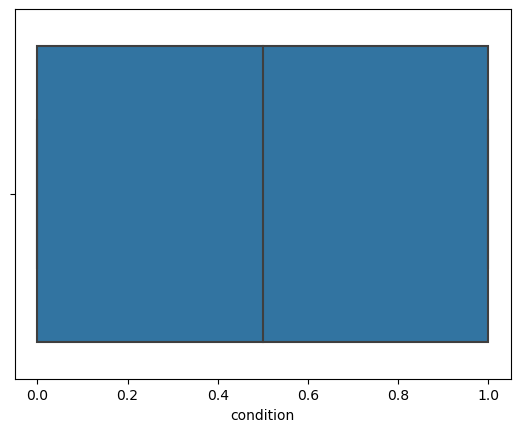

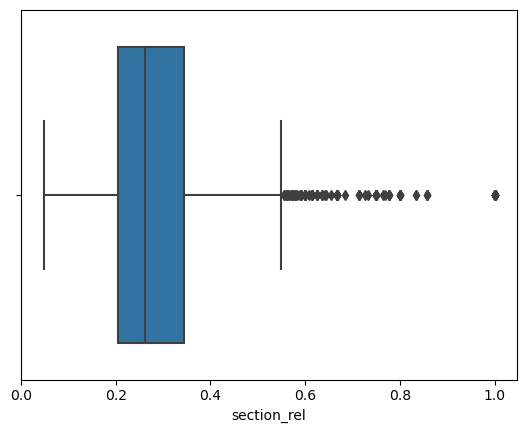

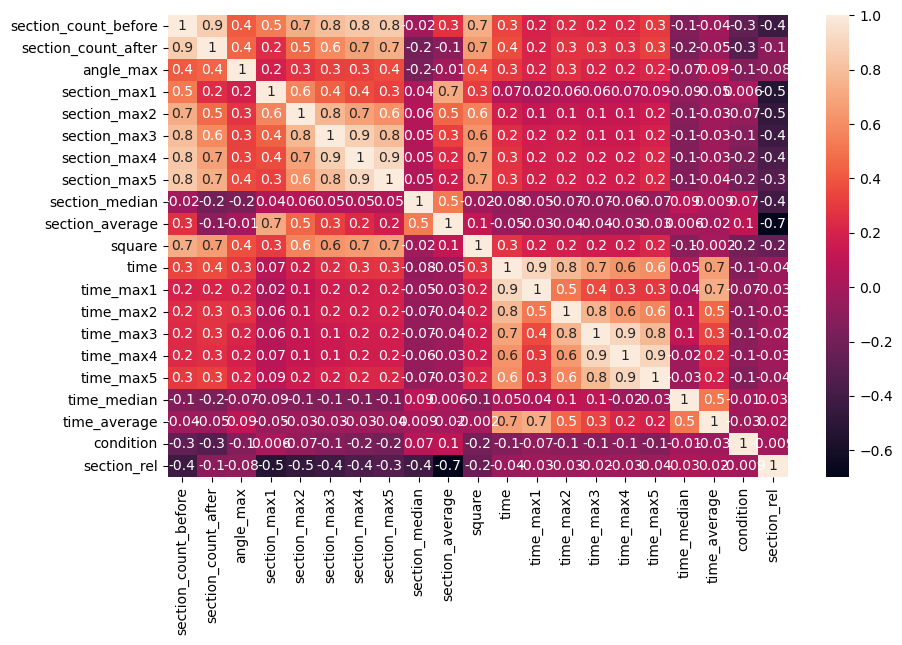

In [12]:
print_hist_boxplot_heatmap(all_data)

In [13]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(1257, 21)

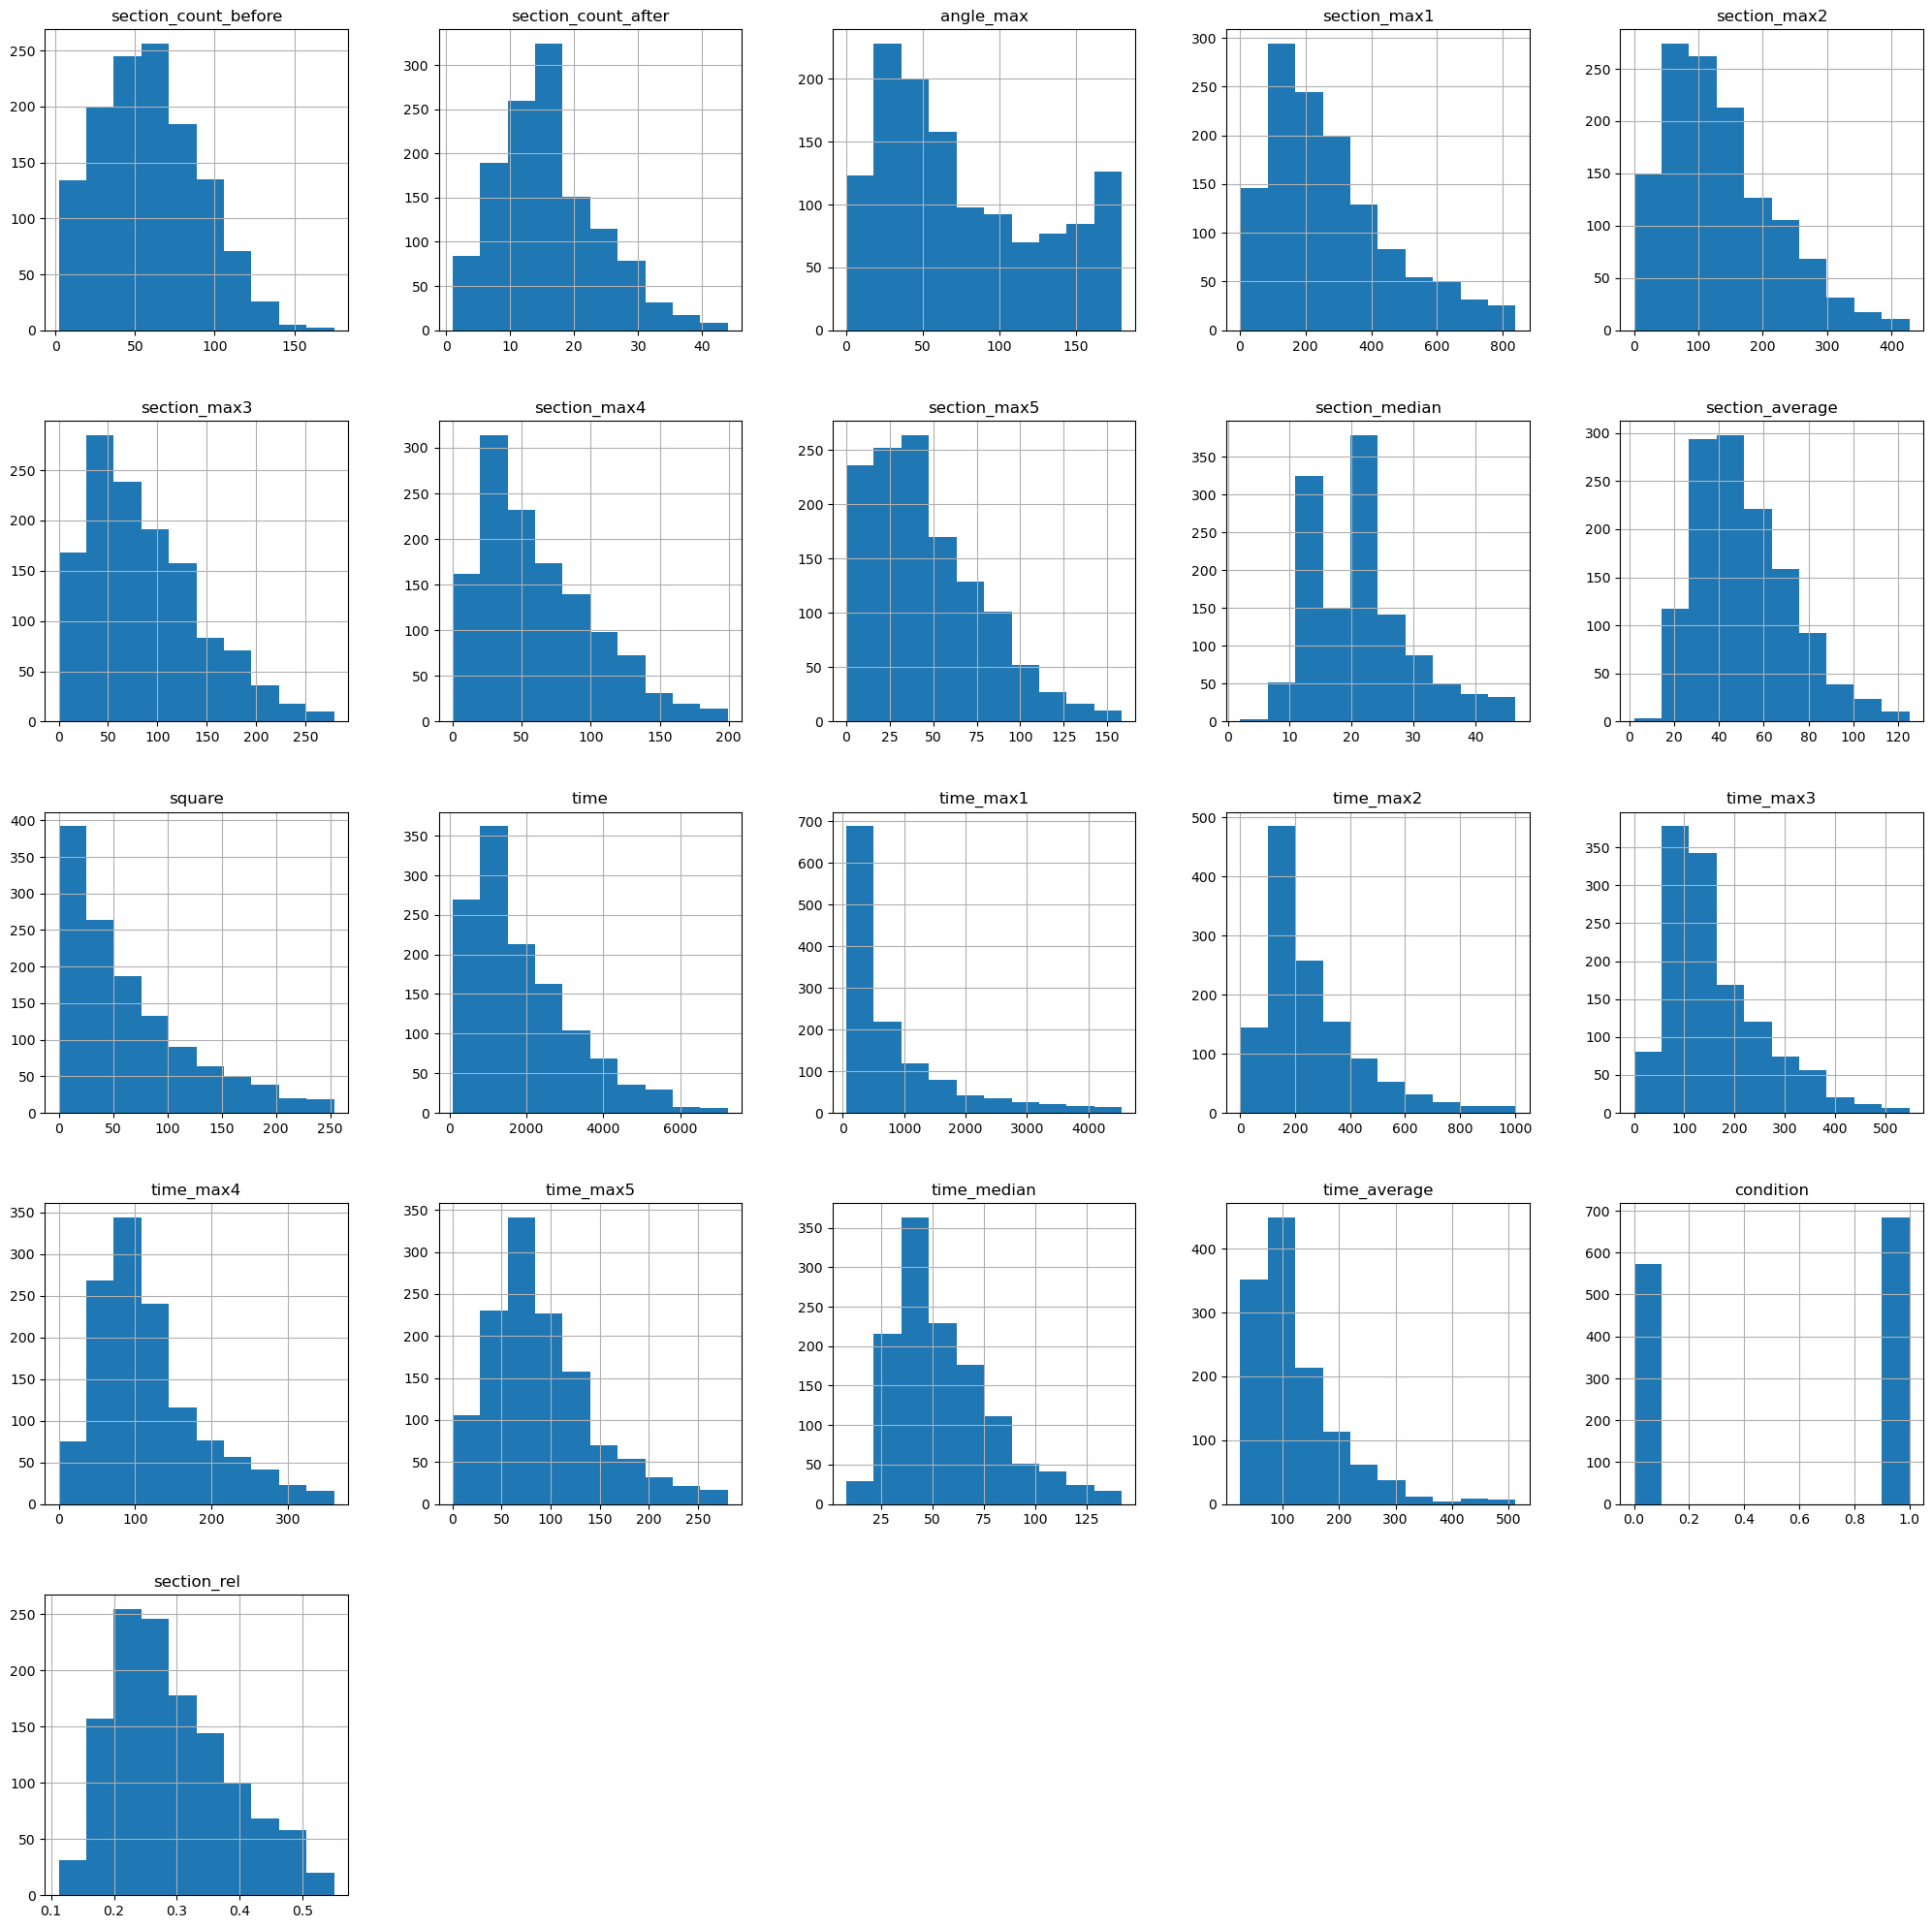

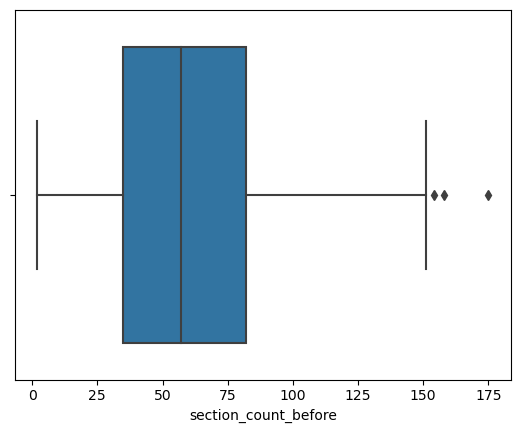

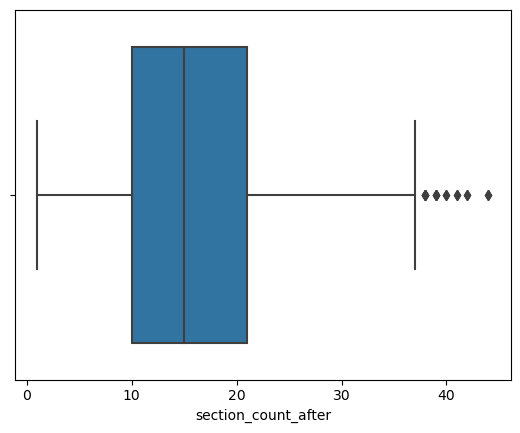

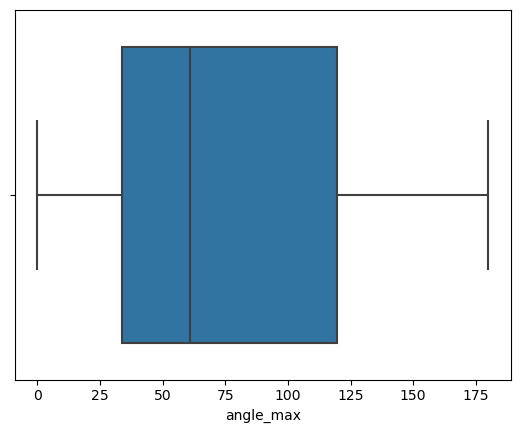

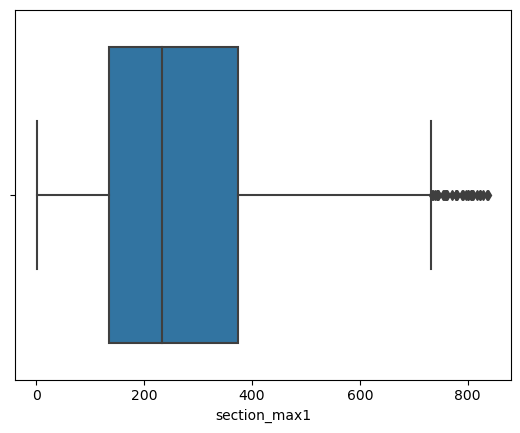

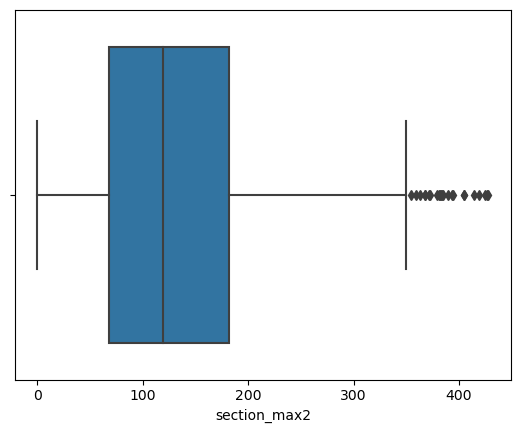

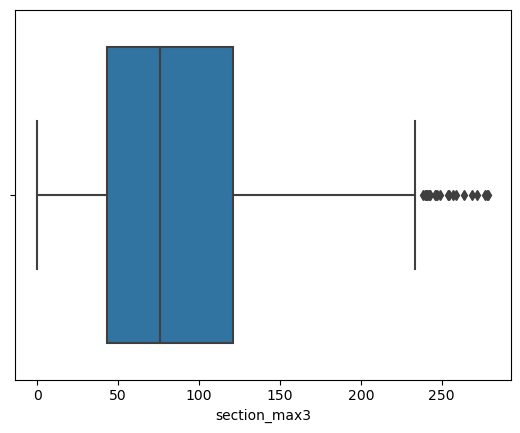

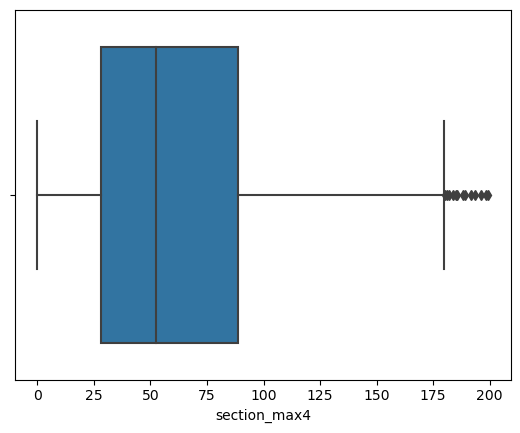

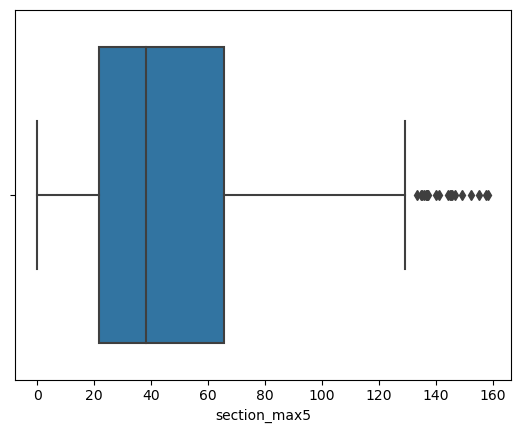

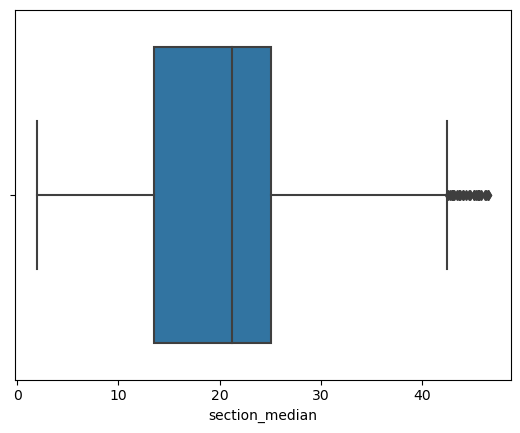

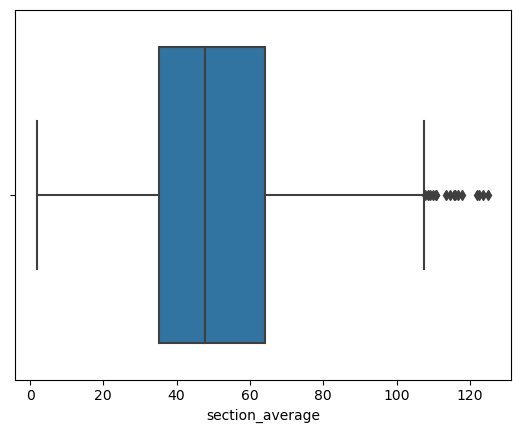

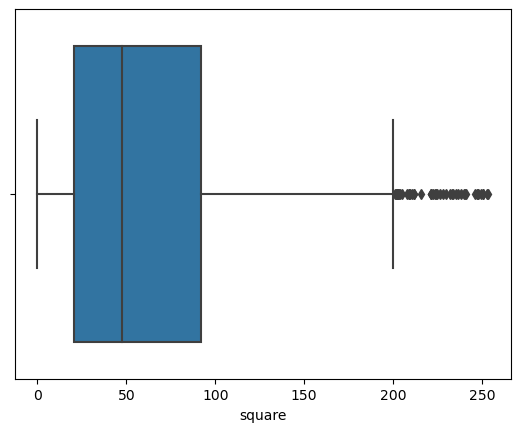

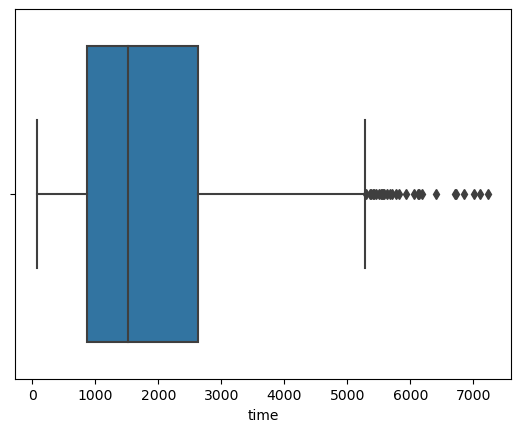

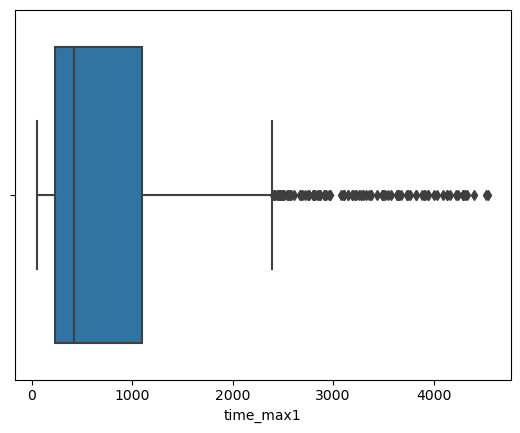

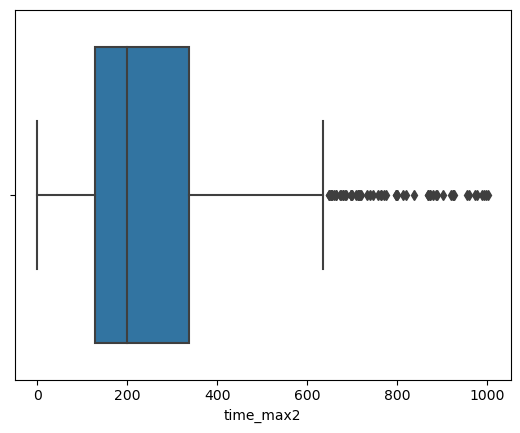

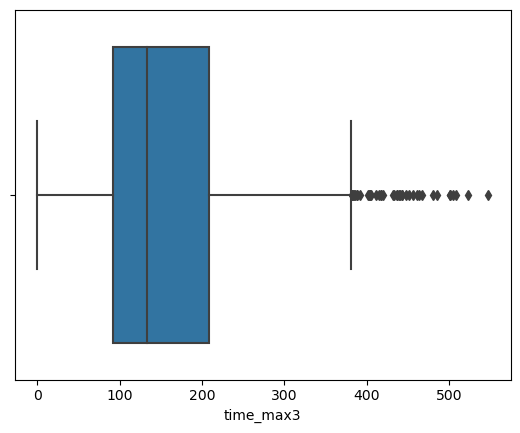

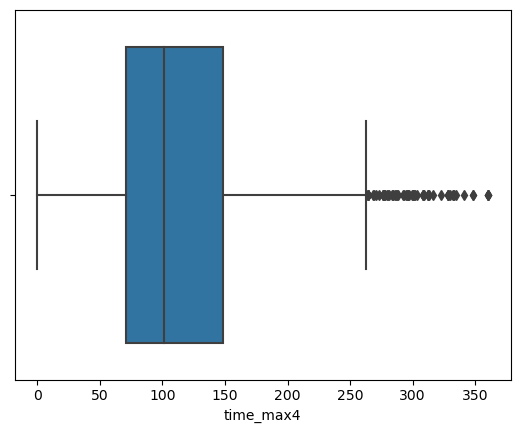

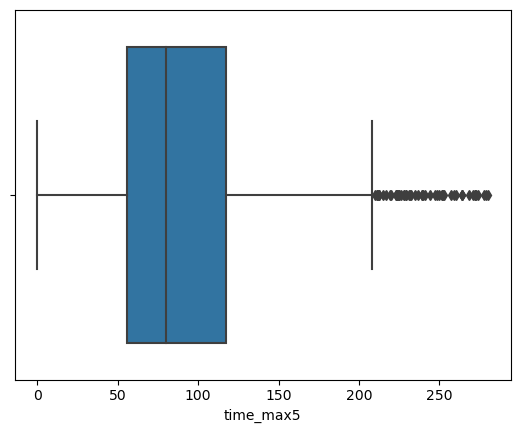

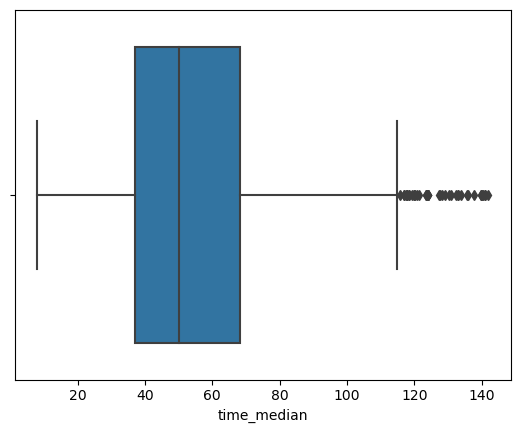

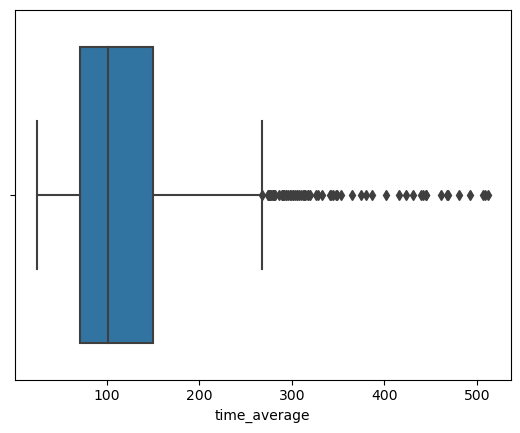

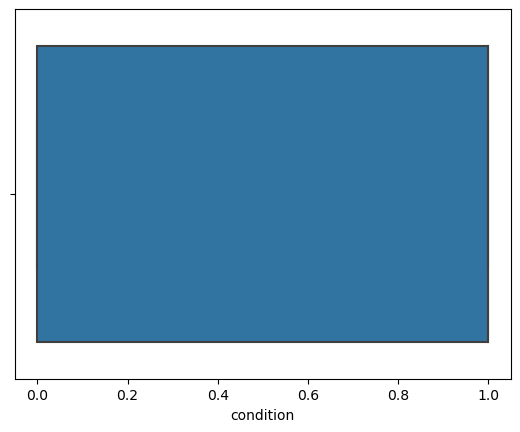

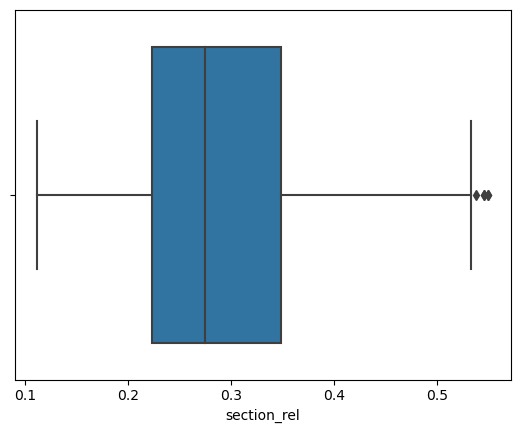

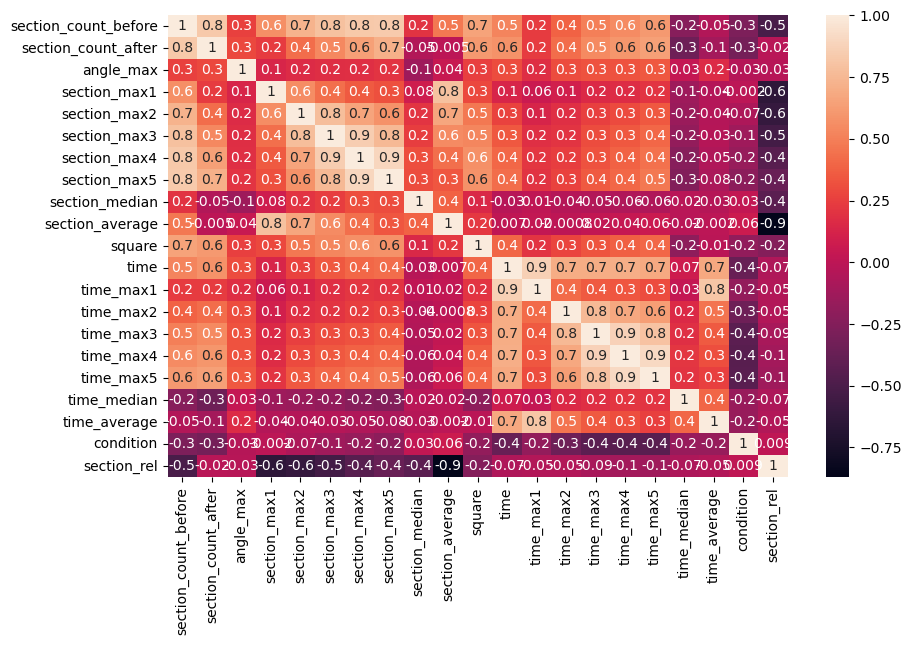

In [14]:
print_hist_boxplot_heatmap(all_data)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale_data = all_data.drop(["condition", 'section_rel'], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data[["condition", 'section_rel']]], axis=1)

In [16]:
# from joblib import dump, load
# dump(scaler, 'std_scaler.bin', compress=True)

In [17]:
#all_data = all_data.drop(['time', 'time_average', 'section_average_value', 'section_max_value'], axis=1)

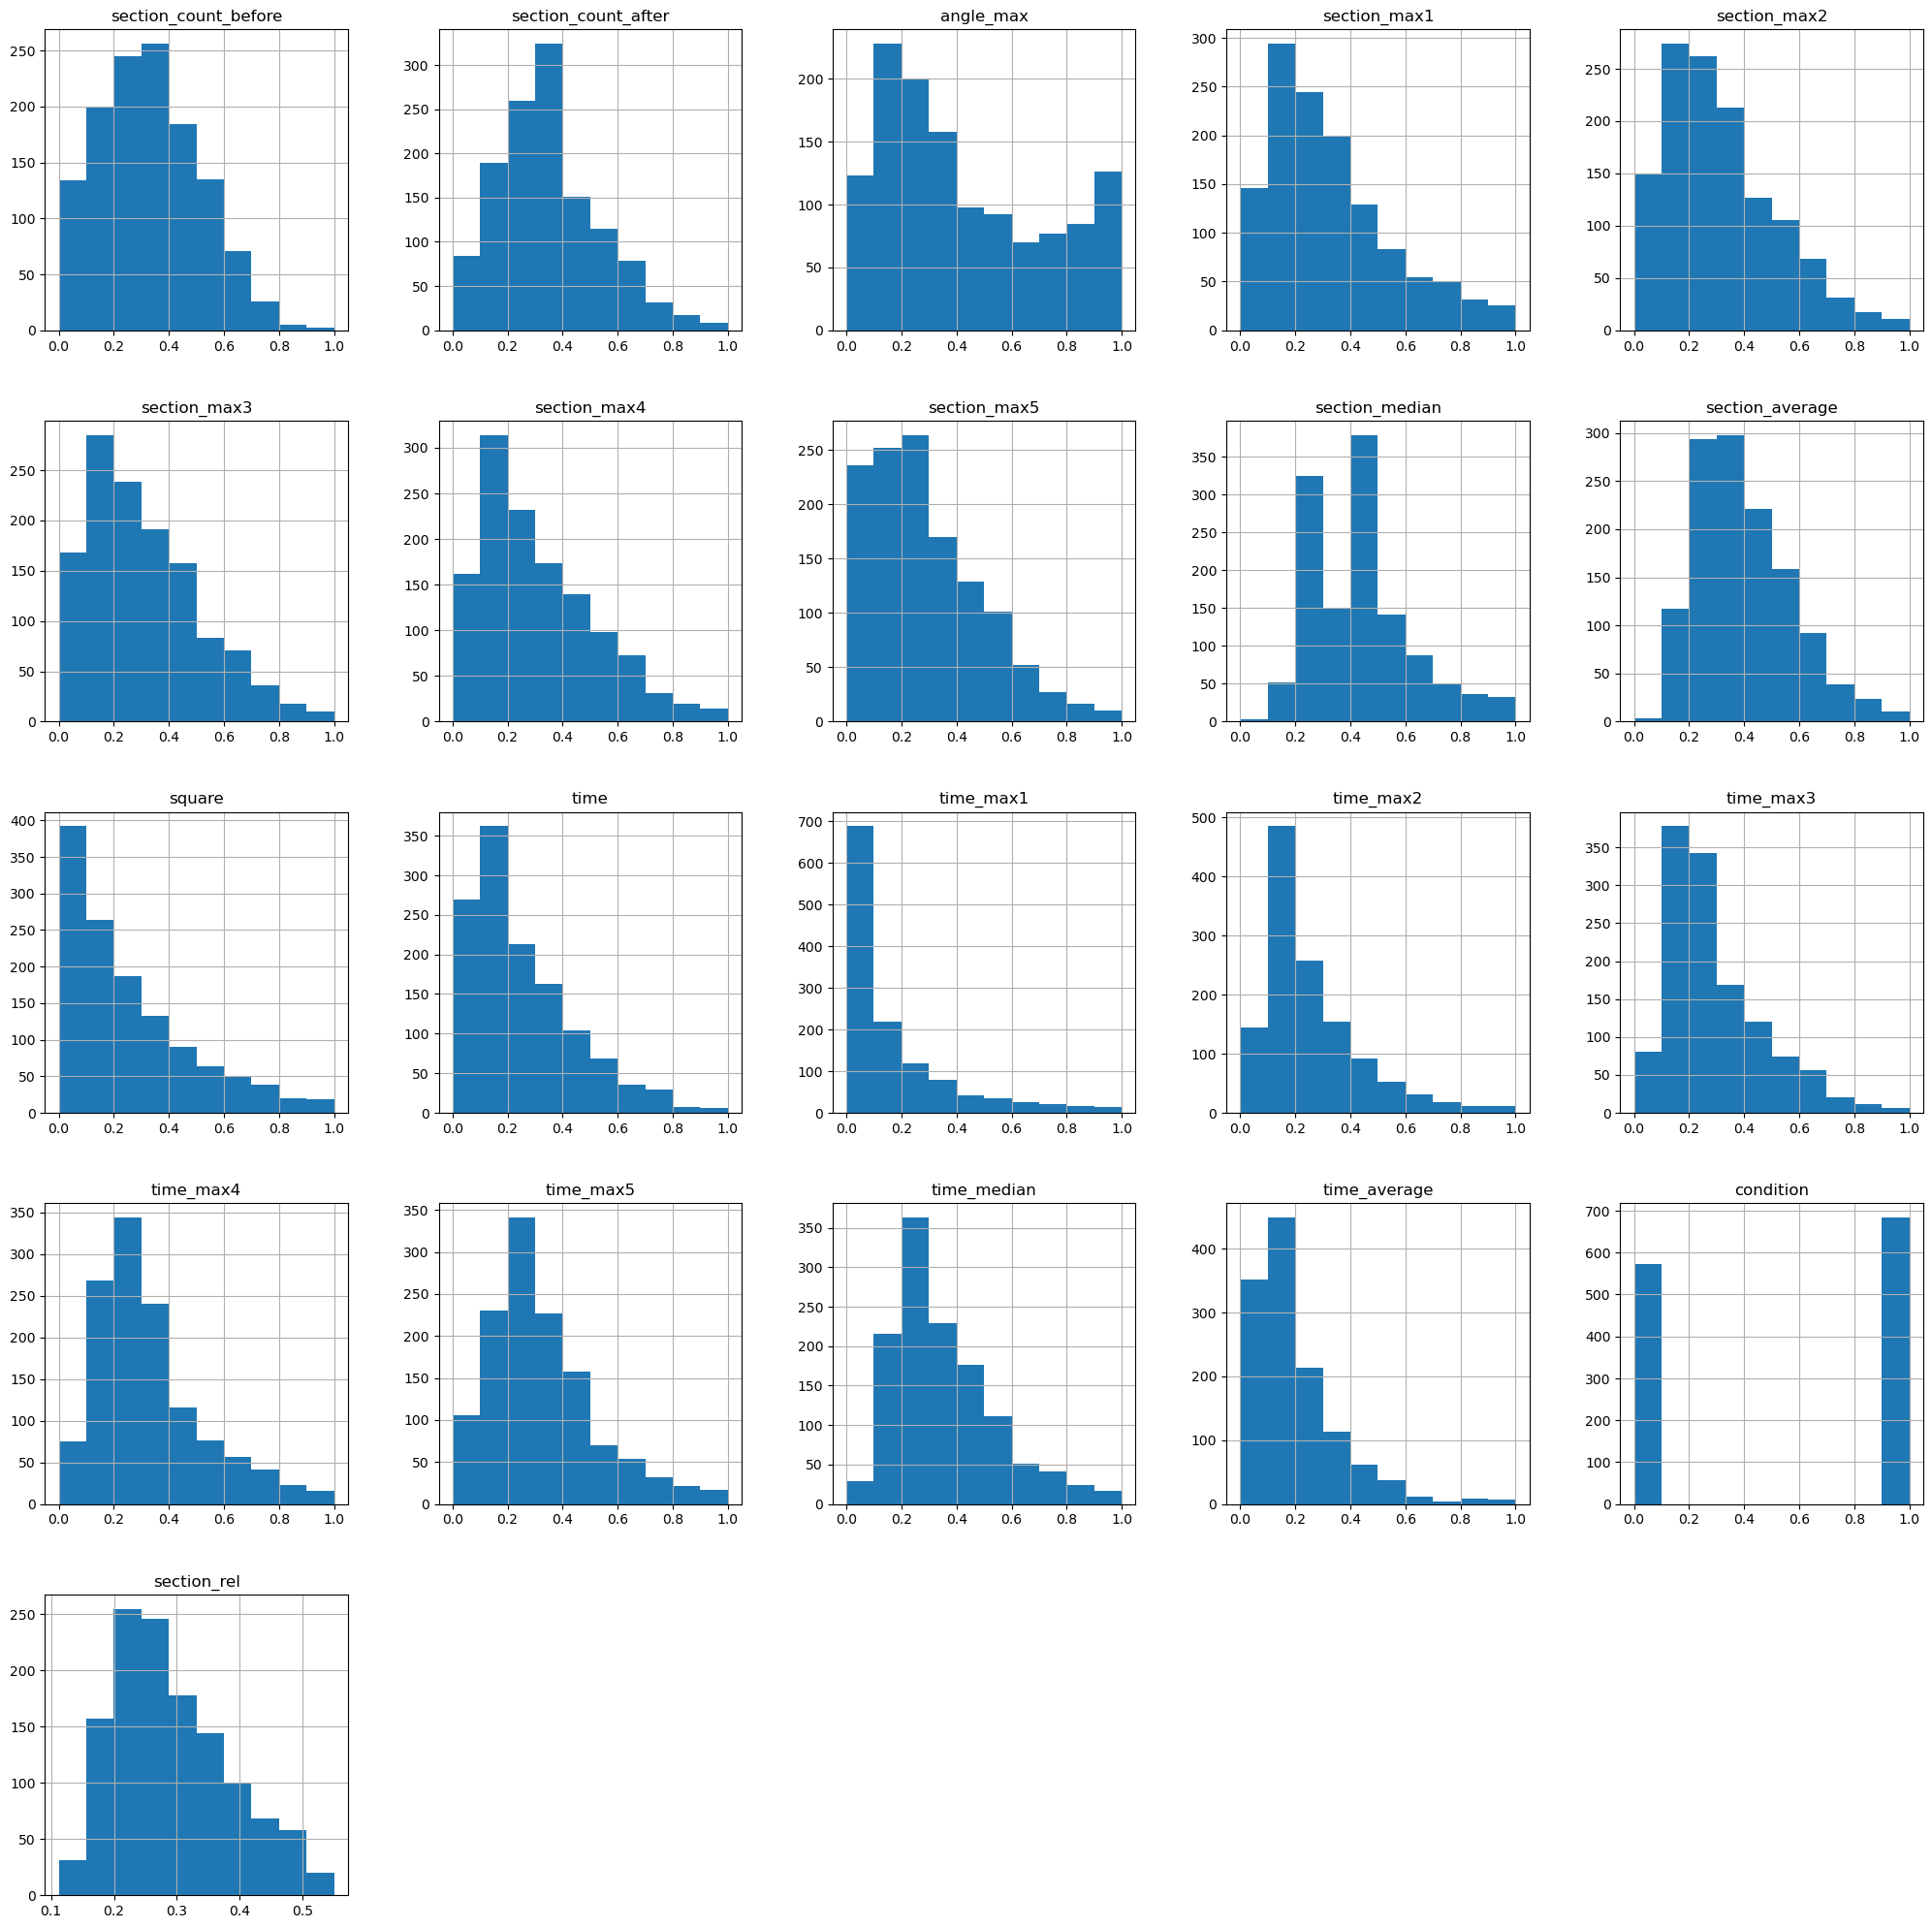

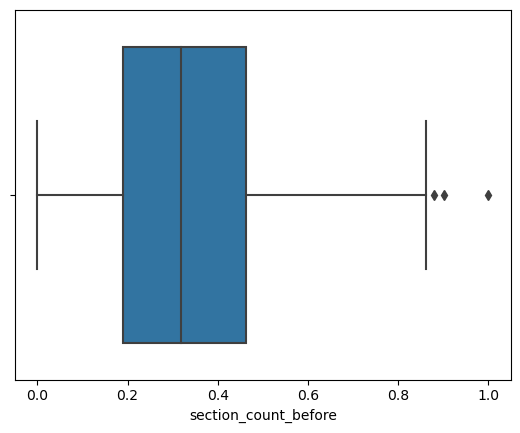

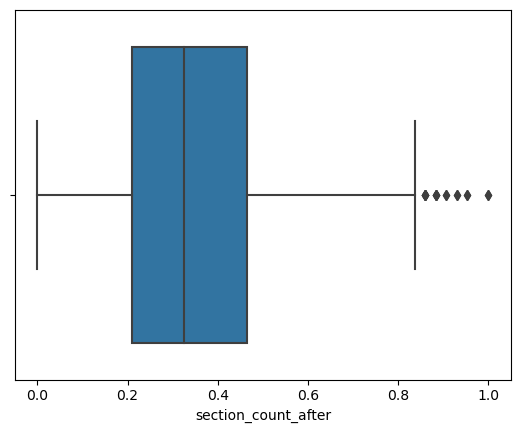

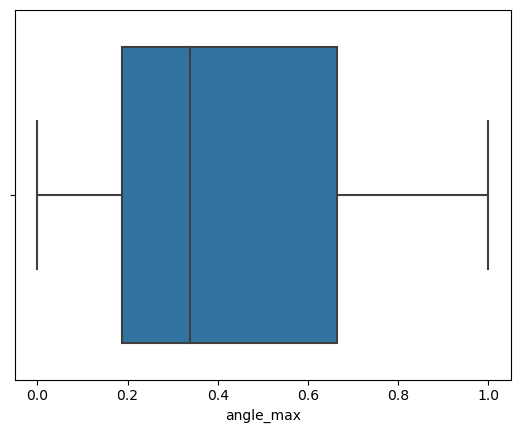

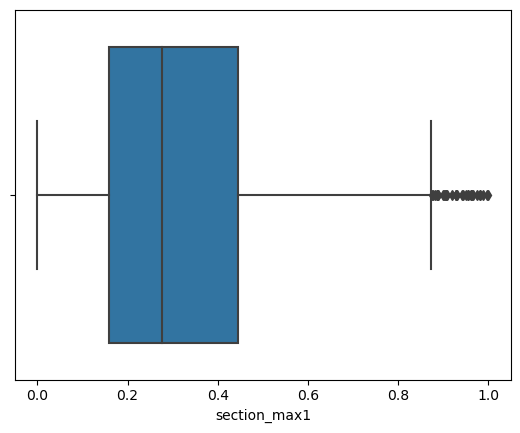

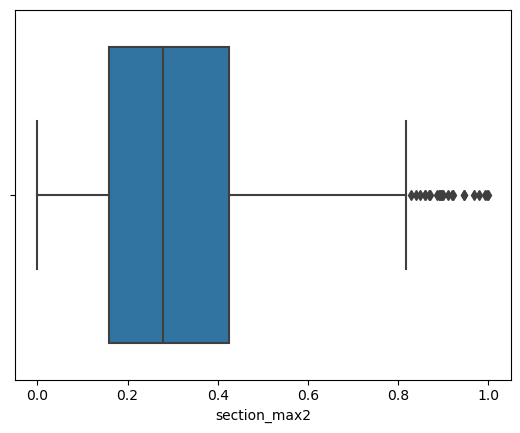

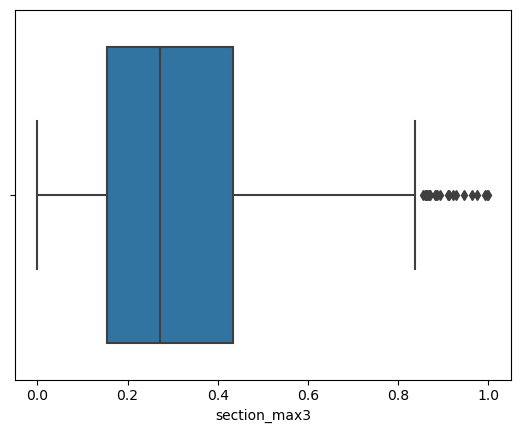

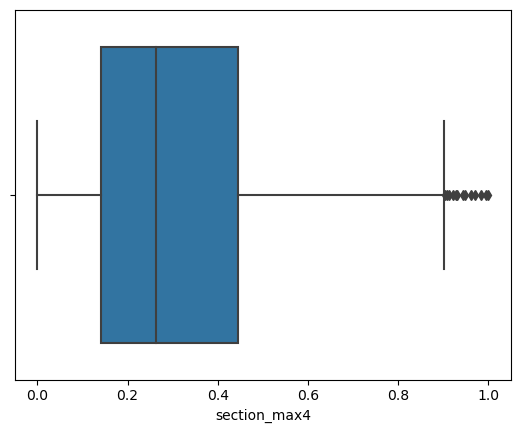

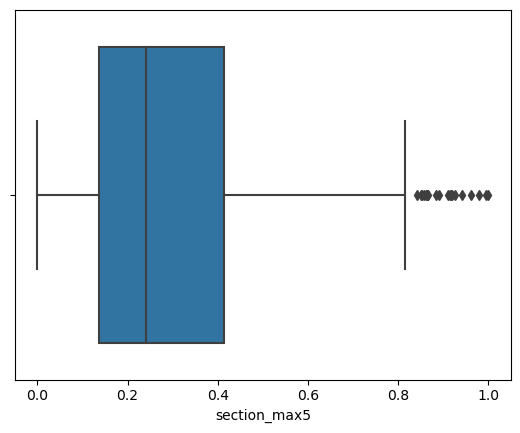

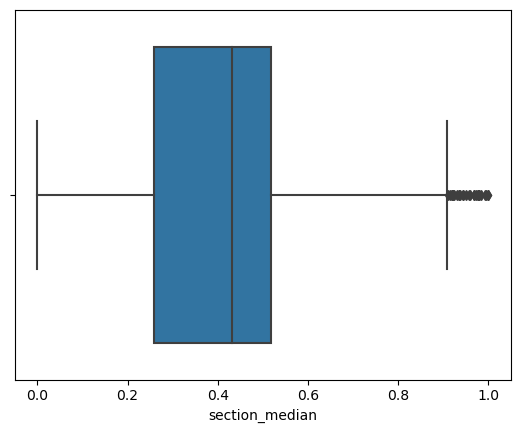

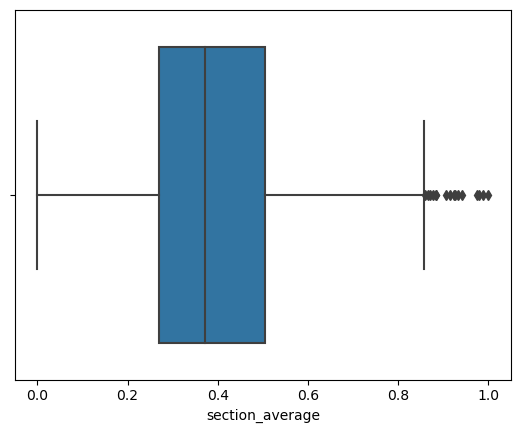

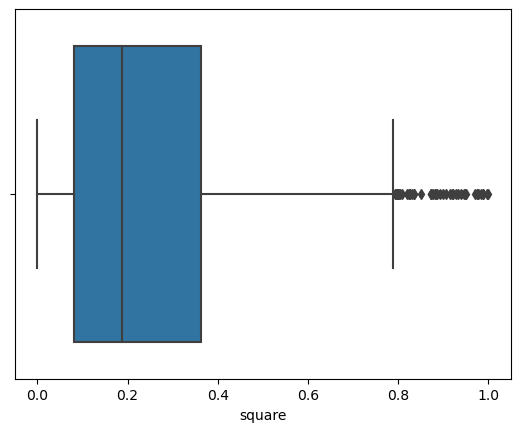

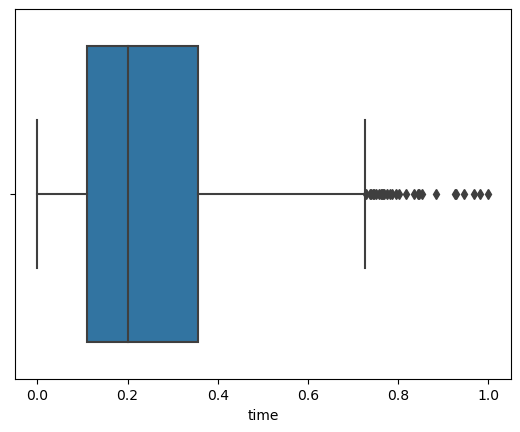

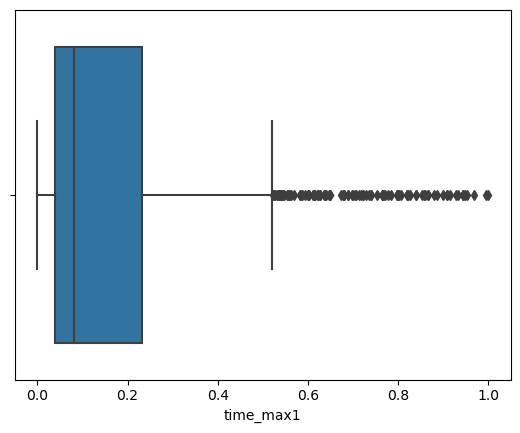

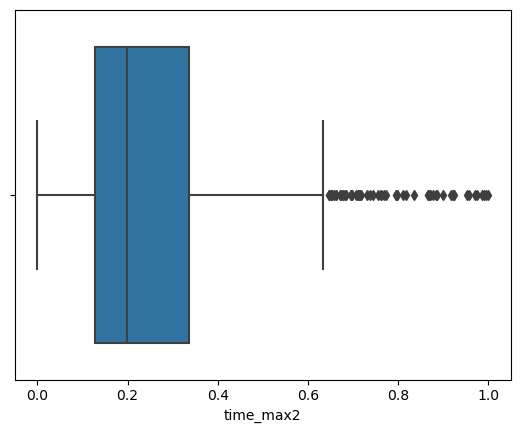

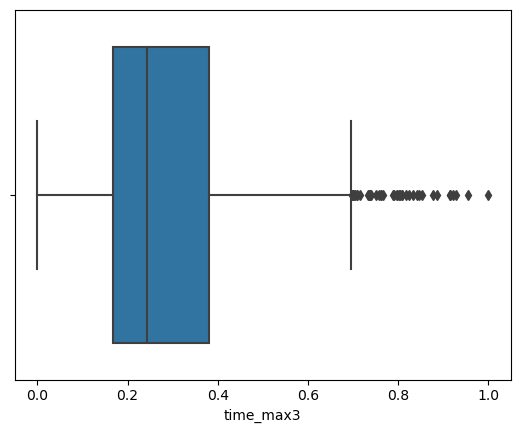

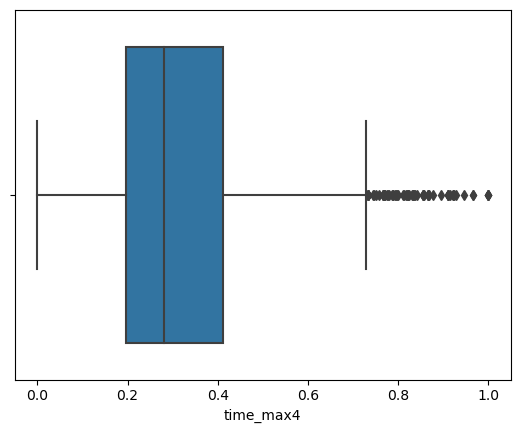

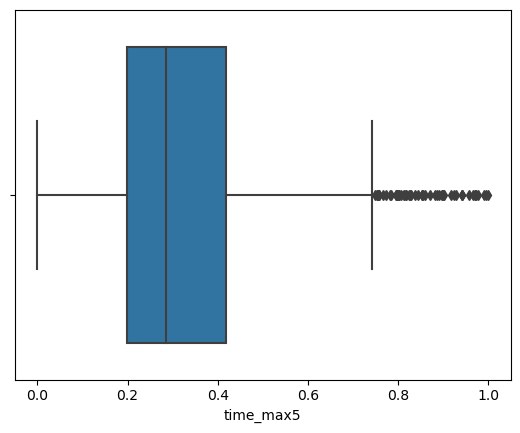

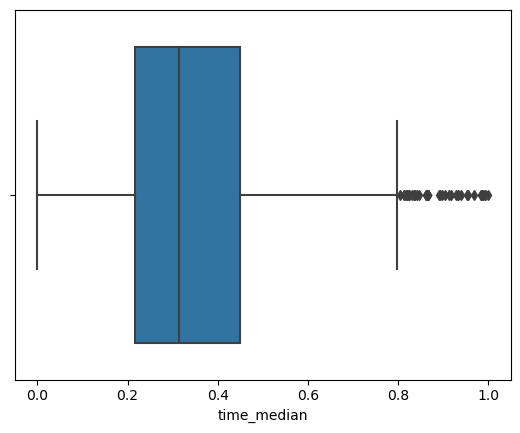

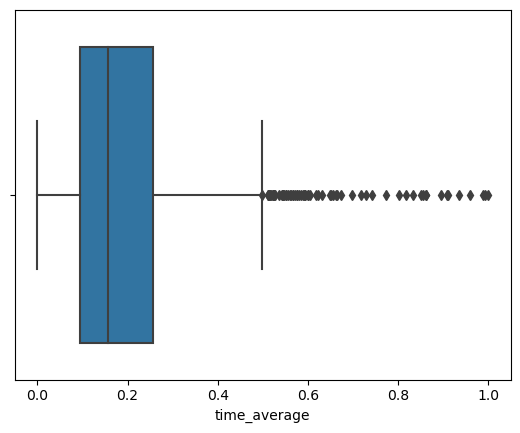

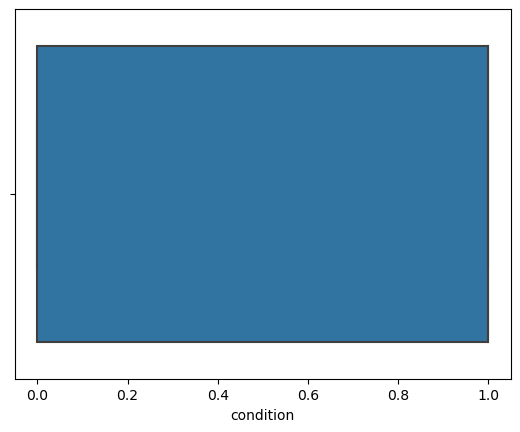

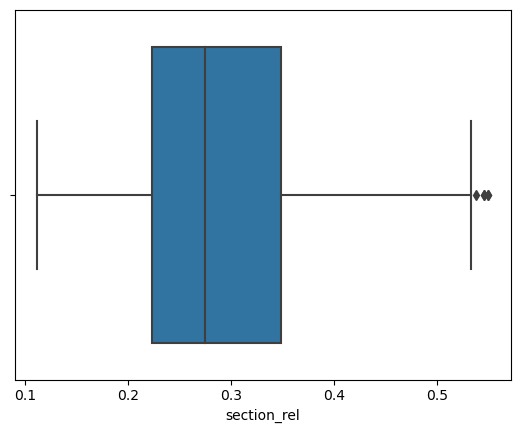

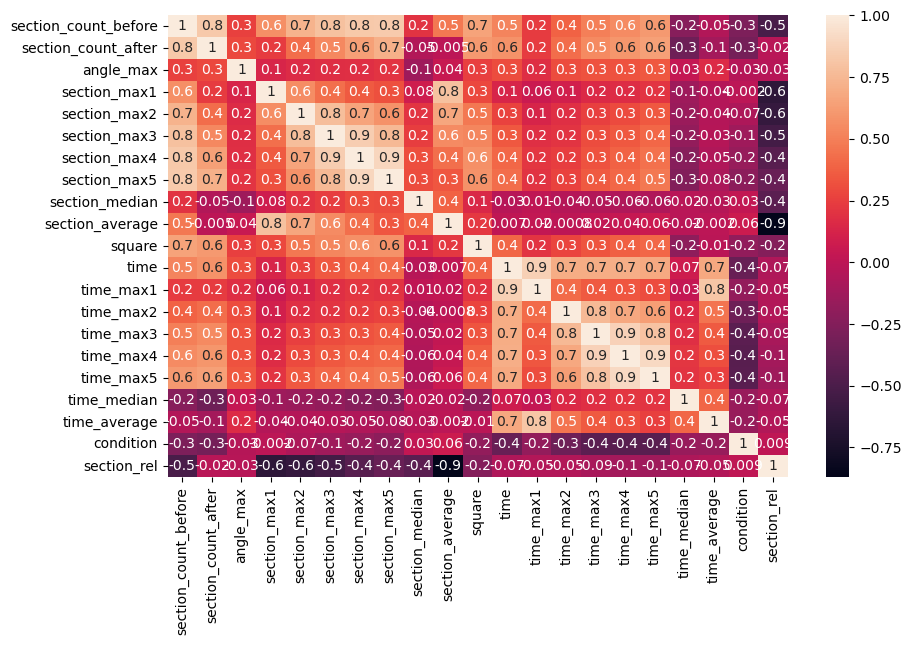

In [16]:
print_hist_boxplot_heatmap(all_data)

In [17]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.39524105 0.171642  ]


Обучение

In [18]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [19]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [20]:
X_train

,section_count_before,section_count_after,angle_max,section_max1,section_max2,section_max3,section_max4,section_max5,section_median,section_average,square,time,time_max1,time_max2,time_max3,time_max4,time_max5,time_median,time_average,section_rel
2421,0.410405,0.418605,0.187167,0.794951,0.410705,0.392426,0.346432,0.373104,0.229209,0.549236,0.334371,0.121595,0.033076,0.100566,0.176237,0.209748,0.211024,0.208633,0.050864,0.260274
1400,0.167630,0.186047,0.584751,0.217957,0.201860,0.181253,0.116670,0.087941,0.267876,0.334458,0.057910,0.199920,0.218698,0.175614,0.151597,0.185849,0.199672,0.358159,0.293095,0.290323
216,0.057803,0.093023,0.066048,0.053363,0.103490,0.094687,0.051154,0.048085,0.547968,0.203329,0.019266,0.052315,0.026155,0.110981,0.148009,0.155260,0.114053,0.544988,0.135168,0.416667
758,0.502890,0.348837,0.468274,0.900303,0.919981,0.229202,0.232691,0.280380,0.479530,0.744919,0.210556,0.125909,0.029810,0.177580,0.242390,0.209522,0.229099,0.238643,0.074114,0.179775
1423,0.526012,0.581395,0.569604,0.202475,0.342702,0.516772,0.638001,0.593265,0.620279,0.384706,0.358032,0.170486,0.023262,0.141026,0.217915,0.260818,0.310428,0.220184,0.050815,0.279570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,0.375723,0.418605,0.147584,0.484033,0.324732,0.163571,0.122969,0.145355,0.232864,0.328962,0.023550,0.084244,0.026094,0.147666,0.219247,0.158104,0.146209,0.000000,0.021963,0.283582
2456,0.208092,0.186047,0.214374,0.206934,0.269564,0.327339,0.140538,0.133190,0.428817,0.418519,0.107418,0.131932,0.108220,0.143885,0.204171,0.154537,0.190234,0.338406,0.182039,0.236842
2115,0.456647,0.441860,0.329310,0.699604,0.611860,0.798896,0.728722,0.459133,0.535235,0.660902,0.594173,0.151798,0.051498,0.231587,0.348909,0.242005,0.231780,0.108160,0.067922,0.246914
2393,0.485549,0.418605,0.232138,0.523483,0.677212,0.726475,0.971101,0.427293,0.453712,0.624594,0.241910,0.344650,0.269878,0.167194,0.238507,0.353683,0.415853,0.417921,0.223454,0.220930


In [21]:
y_train

2421    0
1400    1
216     0
758     1
1423    1
       ..
1968    0
2456    0
2115    0
2393    0
2210    0
Name: condition, Length: 1005, dtype: int64

Градиентый бустинг

In [22]:
from xgboost import XGBClassifier

In [23]:
grid_param = {'learning_rate': [0.001, 0.01, 0.1], 
        'min_child_weight': [1, 5, 10],
        'max_depth': [5, 10, 15],
        'n_estimators': [10, 50, 100, 500, 1000]
        }

In [24]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 10, 15],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [25]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 15,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 50,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [26]:
y_pred = best_clf.predict(X_test)

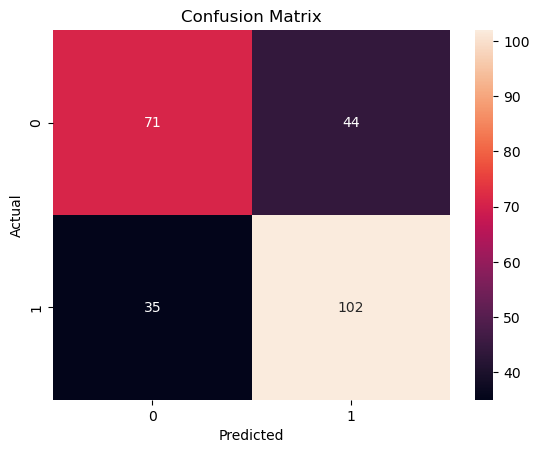

In [27]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [28]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.62      0.64       115
     class 1       0.70      0.74      0.72       137

    accuracy                           0.69       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.69      0.69      0.69       252



In [364]:
best_clf.save_model('xgb_model.json')

In [365]:
type(best_clf)

xgboost.sklearn.XGBClassifier

In [366]:
X_test

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,section_rel
2347,117,28,153.799885,610.358911,65.663809,22.514514,127.672834,1692.8424,22.19620,60.458657,0.239316
1980,38,16,21.801409,74.000000,28.298032,17.530560,32.475584,664.9748,35.81785,41.560925,0.421053
461,61,16,133.051915,141.834410,50.129961,31.262434,60.011475,3050.3306,39.62645,190.645662,0.262295
281,57,15,102.578935,381.903129,48.025899,12.369317,71.088473,1615.5248,56.55390,107.701653,0.263158
428,48,8,19.759471,242.330353,78.534989,38.949750,6.501587,659.5197,72.27355,82.439963,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
1932,60,17,32.969404,142.618372,43.206912,20.880613,31.567653,702.7768,24.00100,41.339812,0.283333
2350,22,7,33.968990,59.816386,32.993878,31.764760,9.186441,851.0626,60.00060,121.580371,0.318182
1553,83,19,30.072226,537.410458,64.652316,19.723083,86.998131,1548.7100,36.00320,81.511053,0.228916
2415,78,16,99.552680,389.344321,63.976156,23.390776,86.384553,3035.2802,26.44070,189.705013,0.205128


In [367]:
X_test.condition

AttributeError: 'DataFrame' object has no attribute 'condition'

Случайный лес

In [29]:
grid_param = {
    'n_estimators': [50, 100, 150, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 2)
}

In [30]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 2),
                         'n_estimators': [50, 100, 150, 200, 400]})

In [31]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
y_pred = best_clf.predict(X_test)

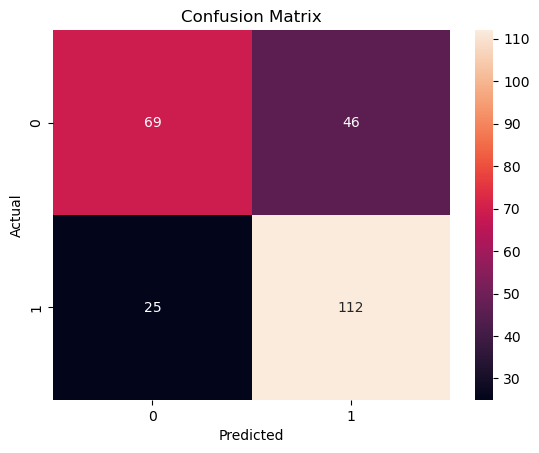

In [33]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [34]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.60      0.66       115
     class 1       0.71      0.82      0.76       137

    accuracy                           0.72       252
   macro avg       0.72      0.71      0.71       252
weighted avg       0.72      0.72      0.71       252



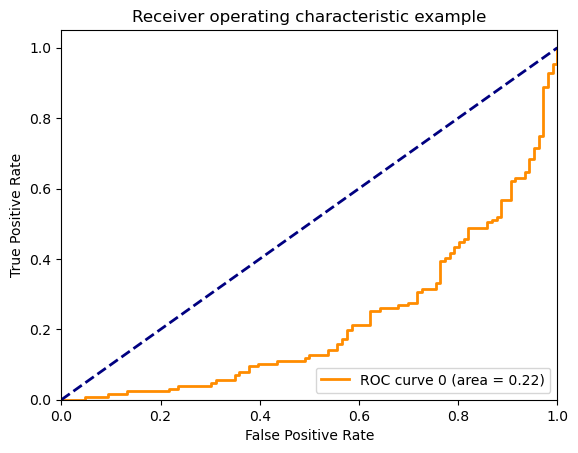

In [38]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

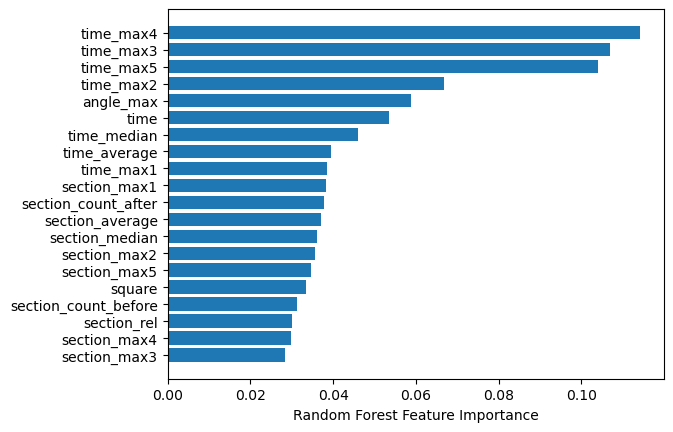

In [35]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [ ]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [ ]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
y_pred = best_clf.predict(X_test)

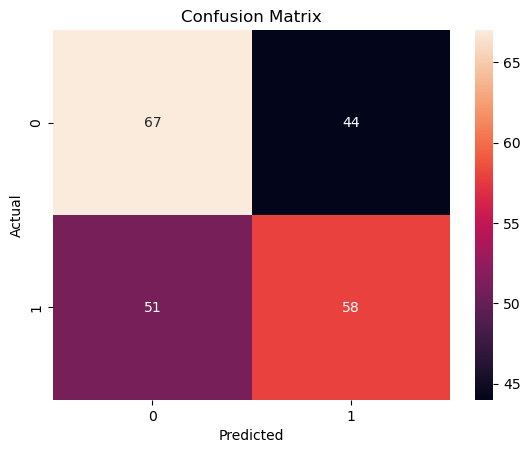

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.60      0.59       111
     class 1       0.57      0.53      0.55       109

    accuracy                           0.57       220
   macro avg       0.57      0.57      0.57       220
weighted avg       0.57      0.57      0.57       220



SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [ ]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [ ]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_pred = best_clf.predict(X_test)

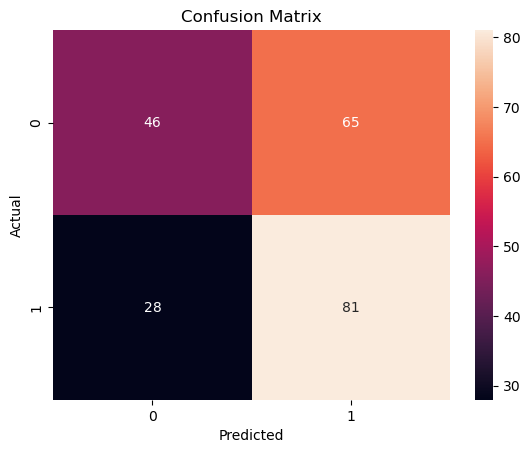

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.41      0.50       111
     class 1       0.55      0.74      0.64       109

    accuracy                           0.58       220
   macro avg       0.59      0.58      0.57       220
weighted avg       0.59      0.58      0.57       220

